In [12]:
import geopandas as gpd

shapefile_path = '../Project 2/G01_VIC_GDA2020.gpkg'
population = gpd.read_file(shapefile_path)
print(population.head())

  GCCSA_CODE_2021                         GCCSA_NAME_2021  Tot_P_M  Tot_P_F  \
0           2GMEL                       Greater Melbourne  2420718  2497033   
1           2RVIC                            Rest of Vic.   775038   801575   
2           29499                 No usual address (Vic.)     5170     3915   
3           29799  Migratory - Offshore - Shipping (Vic.)       36        6   

   Tot_P_P  Age_0_4_yr_M  Age_0_4_yr_F  Age_0_4_yr_P  Age_5_14_yr_M  \
0  4917750        149255        141400        290649         308606   
1  1576613         43195         41636         84837          99014   
2     9089           222           189           414            370   
3       38             0             0             0              0   

   Age_5_14_yr_F  ...  High_yr_schl_comp_D_n_g_sch_F  \
0         292330  ...                          34052   
1          92883  ...                           3731   
2            361  ...                             18   
3              0  ...   

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyogrio\geopandas.py:261: UserWarning: More than one layer found in 'G01_VIC_GDA2020.gpkg': 'G01_GCCSA_2021_VIC' (default), 'G01_UCL_2021_VIC', 'G01_SUA_2021_VIC', 'G01_SOSR_2021_VIC', 'G01_SOS_2021_VIC', 'G01_CED_2021_VIC', 'G01_LGA_2021_VIC', 'G01_POA_2021_VIC', 'G01_SA1_2021_VIC', 'G01_SA2_2021_VIC', 'G01_SA3_2021_VIC', 'G01_SA4_2021_VIC', 'G01_SAL_2021_VIC', 'G01_SED_2021_VIC', 'G01_STE_2021_VIC', 'G01_RA_2021_VIC'. Specify layer parameter to avoid this warning.
  result = read_func(


In [13]:
print(population.columns)

total_columns = len(population.columns)
print(f"总共有 {total_columns} 列")

Index(['GCCSA_CODE_2021', 'GCCSA_NAME_2021', 'Tot_P_M', 'Tot_P_F', 'Tot_P_P',
       'Age_0_4_yr_M', 'Age_0_4_yr_F', 'Age_0_4_yr_P', 'Age_5_14_yr_M',
       'Age_5_14_yr_F',
       ...
       'High_yr_schl_comp_D_n_g_sch_F', 'High_yr_schl_comp_D_n_g_sch_P',
       'Count_psns_occ_priv_dwgs_M', 'Count_psns_occ_priv_dwgs_F',
       'Count_psns_occ_priv_dwgs_P', 'Count_Persons_other_dwgs_M',
       'Count_Persons_other_dwgs_F', 'Count_Persons_other_dwgs_P',
       'AREA_ALBERS_SQKM', 'geometry'],
      dtype='object', length=112)
总共有 112 列


In [14]:
# Select the desired column
selected_columns = population[['GCCSA_NAME_2021', 'Tot_P_P']]

print(selected_columns.head())


                          GCCSA_NAME_2021  Tot_P_P
0                       Greater Melbourne  4917750
1                            Rest of Vic.  1576613
2                 No usual address (Vic.)     9089
3  Migratory - Offshore - Shipping (Vic.)       38


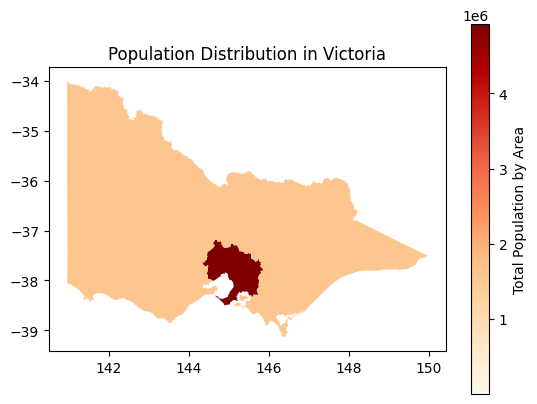

In [4]:
import matplotlib.pyplot as plt

# Draw the map and color it according to the total population
population.plot(column='Tot_P_P', cmap='OrRd', legend=True, legend_kwds={'label': "Total Population by Area"})
plt.title('Population Distribution in Victoria')
plt.show()


In [5]:
shapefile = gpd.read_file('../Project 2/SA2_2021_AUST_GDA2020.shp')

    SA2_CODE21     SA2_NAME21 CHG_FLAG21  CHG_LBL21 SA3_CODE21 SA3_NAME21  \
644  201011001      Alfredton          0  No change      20101   Ballarat   
645  201011002       Ballarat          0  No change      20101   Ballarat   
646  201011005      Buninyong          0  No change      20101   Ballarat   
647  201011006      Delacombe          0  No change      20101   Ballarat   
648  201011007  Smythes Creek          0  No change      20101   Ballarat   

    SA4_CODE21 SA4_NAME21 GCC_CODE21    GCC_NAME21 STE_CODE21 STE_NAME21  \
644        201   Ballarat      2RVIC  Rest of Vic.          2   Victoria   
645        201   Ballarat      2RVIC  Rest of Vic.          2   Victoria   
646        201   Ballarat      2RVIC  Rest of Vic.          2   Victoria   
647        201   Ballarat      2RVIC  Rest of Vic.          2   Victoria   
648        201   Ballarat      2RVIC  Rest of Vic.          2   Victoria   

    AUS_CODE21 AUS_NAME21  AREASQKM21  \
644        AUS  Australia     52.7109  

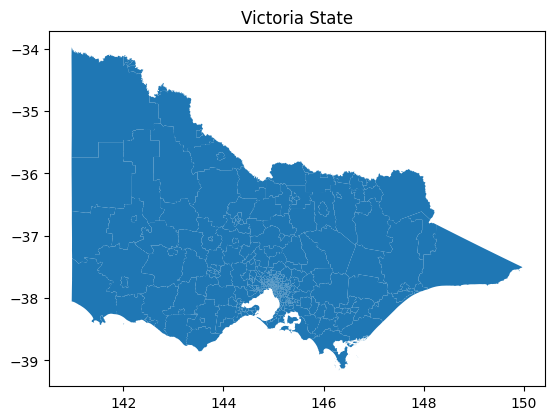

In [26]:
# Filter out data for Victoria
vic_shapefile = shapefile[shapefile['STE_NAME21'] == 'Victoria']

print(vic_shapefile.head())

# Map Victoria
vic_shapefile.plot()
plt.title('Victoria State')
plt.show()

In [18]:

print(population[['GCCSA_NAME_2021']])

                          GCCSA_NAME_2021
0                       Greater Melbourne
1                            Rest of Vic.
2                 No usual address (Vic.)
3  Migratory - Offshore - Shipping (Vic.)


In [19]:
print(vic_shapefile[['GCC_NAME21']])

                                  GCC_NAME21
644                             Rest of Vic.
645                             Rest of Vic.
646                             Rest of Vic.
647                             Rest of Vic.
648                             Rest of Vic.
...                                      ...
1163                            Rest of Vic.
1164                            Rest of Vic.
1165                            Rest of Vic.
1166  Migratory - Offshore - Shipping (Vic.)
1167                 No usual address (Vic.)

[524 rows x 1 columns]


In [20]:
unique_values = vic_shapefile['GCC_NAME21'].unique()
print(unique_values)

['Rest of Vic.' 'Greater Melbourne'
 'Migratory - Offshore - Shipping (Vic.)' 'No usual address (Vic.)']


In [21]:
# merge using the GeoPandas merge method
merged_gdf = vic_shapefile.merge(population, how='left', left_on='GCC_NAME21', right_on='GCCSA_NAME_2021')

print(merged_gdf.head())


  SA2_CODE21     SA2_NAME21 CHG_FLAG21  CHG_LBL21 SA3_CODE21 SA3_NAME21  \
0  201011001      Alfredton          0  No change      20101   Ballarat   
1  201011002       Ballarat          0  No change      20101   Ballarat   
2  201011005      Buninyong          0  No change      20101   Ballarat   
3  201011006      Delacombe          0  No change      20101   Ballarat   
4  201011007  Smythes Creek          0  No change      20101   Ballarat   

  SA4_CODE21 SA4_NAME21 GCC_CODE21    GCC_NAME21  ...  \
0        201   Ballarat      2RVIC  Rest of Vic.  ...   
1        201   Ballarat      2RVIC  Rest of Vic.  ...   
2        201   Ballarat      2RVIC  Rest of Vic.  ...   
3        201   Ballarat      2RVIC  Rest of Vic.  ...   
4        201   Ballarat      2RVIC  Rest of Vic.  ...   

  High_yr_schl_comp_D_n_g_sch_F High_yr_schl_comp_D_n_g_sch_P  \
0                          3731                          7692   
1                          3731                          7692   
2          

In [23]:
print(merged_gdf.columns)

Index(['SA2_CODE21', 'SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21',
       'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21',
       ...
       'High_yr_schl_comp_D_n_g_sch_F', 'High_yr_schl_comp_D_n_g_sch_P',
       'Count_psns_occ_priv_dwgs_M', 'Count_psns_occ_priv_dwgs_F',
       'Count_psns_occ_priv_dwgs_P', 'Count_Persons_other_dwgs_M',
       'Count_Persons_other_dwgs_F', 'Count_Persons_other_dwgs_P',
       'AREA_ALBERS_SQKM', 'geometry_y'],
      dtype='object', length=129)


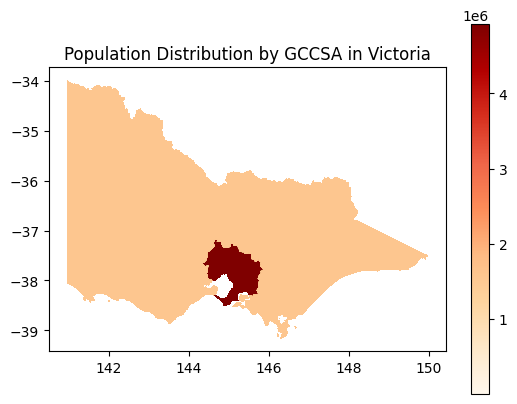

In [24]:
# Set 'geometry_y' to the active geometry column
merged_gdf = merged_gdf.set_geometry('geometry_y')

import matplotlib.pyplot as plt

# Map colored by total population (Tot_P_P column)
merged_gdf.plot(column='Tot_P_P', cmap='OrRd', legend=True)
plt.title('Population Distribution by GCCSA in Victoria')
plt.show()
